In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Define cluster centers and colors
cluster_centres = np.array([[-1, -3], [2, 2]])
colour_list = ['red', 'blue']

# Function to generate data with specified number of samples per cluster
def generateData(num_samples_pc, dimensions=2, cluster_locs=cluster_centres):
    data = []
    labels = []

    # Iterate over clusters
    for c, locs in enumerate(cluster_locs):
        # Generate random points based on normal distribution around cluster center
        pos = np.random.randn(num_samples_pc, dimensions) + locs
        data.append(pos)
        # Assign labels to the generated points
        labels.append(np.ones(num_samples_pc) * c)

    # Combine data and labels into numpy arrays
    data_np = np.concatenate(data, axis=0)
    labels_np = np.concatenate(labels, axis=0)
    return data_np, labels_np

train_data, train_labs = generateData(500) # generate training data for 500 samples per cluster
test_data, test_labs = generateData(30) # generate testing data for 30 samples per cluster

In [67]:
def plot_data(data, labs, a=None, b=None, c=None, color=colour_list):
  plt.xlim([-8, 8])
  plt.ylim([-8, 8])
  for ic in range(2):
      ind_class = np.where(labs == ic) # identifies datapoints of the current class (0 or 1)
      # creates a scatter plot for the points of the current class
      plt.scatter(data[ind_class, 0], data[ind_class, 1], s=10, color=color[ic], label=str(ic))

  # Plot the decision boundary if coefficients are provided
  if a is not None and b is not None and c is not None:
    x = np.linspace(-8, 8, 10)
    y = ( - a * x - c) / b
    plt.plot(x, y)

  plt.ylabel("x2")
  plt.xlabel("x1")
  plt.gca().set_aspect('equal')
  plt.show()

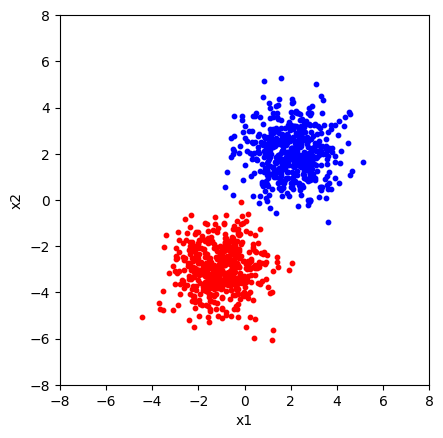

In [68]:
plot_data(train_data, train_labs)

In [69]:
# implementing sigmoid function
def sigmoid(x):
  sigmoid_value = 1/(1+np.exp(-x))
  return sigmoid_value

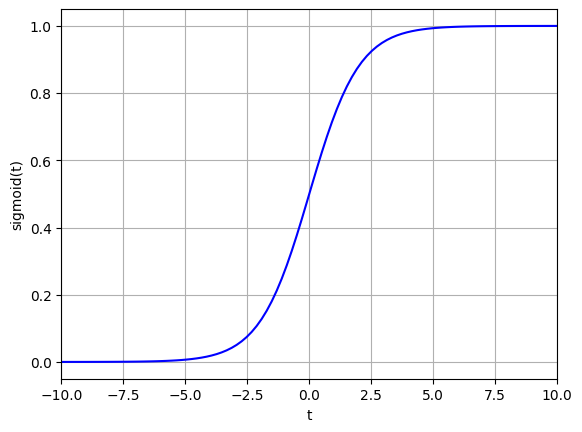

In [70]:
# plotting the sigmoid function
t = np.linspace(-10, 10, 100)
sigmoid_t = sigmoid(t)
plt.plot(t, sigmoid_t, 'b-')
plt.xlim([-10, 10])
plt.xlabel("t")
plt.ylabel("sigmoid(t)")
plt.grid(True)
plt.show()

In [71]:
# predictive probability of a 2D data point x = (x_1, x_2)
def predictive_prob(x, a, b, c):
  t = a*x[:,0] + b*x[:,1] + c # evaluating ax_1+bx_2+c
  pred_prob = sigmoid(t)
  return pred_prob

In [72]:
# implementing the binary cross entropy loss
def bce_loss(pred_probs, y):
  # Clip predicted probabilities to avoid numerical instability
  pred_probs = np.clip(pred_probs, 1e-6, 1 - 1e-6)

  # bce loss calculation
  bce = np.sum(-1 * y * np.log(pred_probs) - (1 - y) * np.log(1 - pred_probs))
    
  return bce

In [73]:
red_label = 0
blue_label = 1

# Reshape cluster centers to ensure correct matrix multiplication
center_red = cluster_centres[0, :].reshape(1, -1)
center_blue = cluster_centres[1, :].reshape(1, -1)

# Use random values a=1, b=6, c=-1 for the decision boundary to find predictive probabilities
prob_red = predictive_prob(center_red, 1, 6, -1)
prob_blue = predictive_prob(center_blue, 1, 6, -1)

print("Probability that center_red is from the blue class is: " + str(prob_red))
print("Probability that center_blue is from the blue class is: " + str(prob_blue))

print("Value of BCE for red center: " + str(bce_loss(prob_red, red_label)))
print("Value of BCE for blue center: " + str(bce_loss(prob_blue, blue_label)))

Probability that center_red is from the blue class is: [2.06115362e-09]
Probability that center_blue is from the blue class is: [0.99999774]
Value of BCE for red center: 1.000000500029089e-06
Value of BCE for blue center: 2.2603268524903463e-06


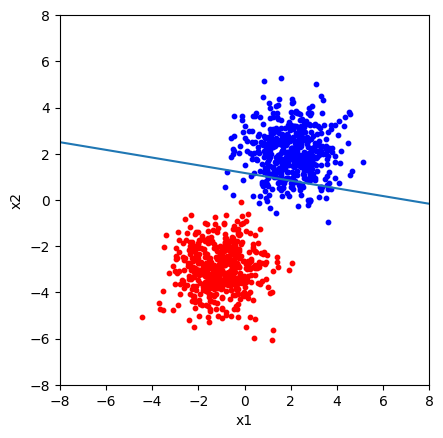

BCE loss: 205.08116242728863


In [74]:
# choosing random a,b,c to predict the probabilities (gives a very higher loss)
a=1
b=6
c=-7

plot_data(train_data, train_labs, a, b, c)
print("BCE loss: " + str(bce_loss(predictive_prob(train_data, a, b, c), train_labs)))

In [75]:
def compute_gradients(x, a, b, c, y):
  # Compute gradients for logistic regression parameters
  grad_a = np.sum(((predictive_prob(x,a,b,c)) - y) * x[:,0])
  grad_b = np.sum(((predictive_prob(x,a,b,c)) - y) * x[:,1])
  grad_c =np.sum((predictive_prob(x,a,b,c)) - y)
  return grad_a, grad_b, grad_c

Iteration 0	Loss 60.239
Iteration 50	Loss 39.742
Iteration 100	Loss 30.789
Iteration 150	Loss 25.700
Iteration 200	Loss 22.387
Iteration 250	Loss 20.041
Iteration 300	Loss 18.284
Iteration 350	Loss 16.912
Iteration 400	Loss 15.808
Iteration 450	Loss 14.897
Iteration 500	Loss 14.130
Iteration 550	Loss 13.475
Iteration 600	Loss 12.907
Iteration 650	Loss 12.410
Iteration 700	Loss 11.969
Iteration 750	Loss 11.576
Iteration 800	Loss 11.223
Iteration 850	Loss 10.903
Iteration 900	Loss 10.612
Iteration 950	Loss 10.346


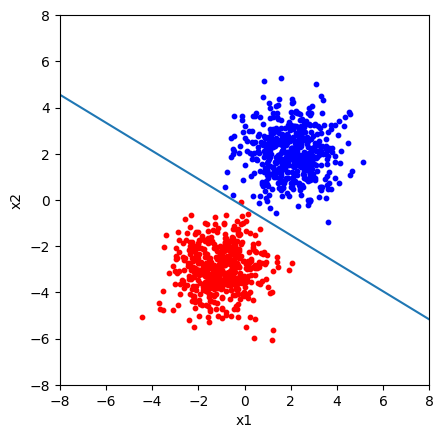

The optimised parameters are: a=1.3087605820579822, b=2.1512182486108427, c=0.6631031130433414


In [76]:
# Starting with some a,b,c then update them at each iteration using gradient descent

def optimize(train_data, train_labs, num_steps):
    # Initialise parameters and learning rate
    a, b, c = 1, 1, 1
    lr = 5e-5

    # Gradient Descent optimisation loop
    for i in range(num_steps):
      # Compute gradients and update parameters
      grad_a, grad_b, grad_c = compute_gradients(train_data, a, b, c, train_labs)
      a = a - lr * grad_a
      b = b - lr * grad_b
      c = c - lr * grad_c

      # Print loss every 50 iterations
      if i % 50 == 0:
        print("Iteration %i\tLoss %.3f" % (i, bce_loss(predictive_prob(train_data, a, b, c), train_labs)))

    # Plot the final decision boundary
    plot_data(train_data, train_labs, a, b, c)

    # Return optimised parameters
    return a, b, c

# Perform optimisation with 1000 steps
a_opt, b_opt, c_opt = optimize(train_data, train_labs, 1000)

print("The optimised parameters are: a=" + str(a_opt) + ", b=" + str(b_opt) + ", c=" + str(c_opt))

In [77]:
# Calculate predicted probabilities for the test data using the optimized parameters
test_prob = predictive_prob(test_data, a=a_opt, b=b_opt, c=c_opt)
print(test_prob)

[4.21126591e-05 8.46063905e-03 8.90343603e-07 5.89528833e-06
 7.68045867e-04 5.40339367e-05 1.19134261e-03 1.21509291e-06
 2.62107815e-03 3.51234445e-05 4.33785463e-05 1.32674489e-01
 1.46587494e-05 8.76014003e-04 6.44968107e-05 6.48726429e-03
 2.82190681e-03 3.59410405e-03 1.96213690e-03 6.83872130e-05
 5.02902906e-04 8.31777880e-02 5.06434523e-06 9.77059321e-04
 1.48908932e-02 1.38511267e-02 6.88388017e-05 2.38534676e-04
 4.20919252e-03 2.07631829e-02 9.99810935e-01 9.98281268e-01
 9.97761136e-01 9.99163754e-01 9.98179921e-01 9.99265179e-01
 9.99559569e-01 9.99004450e-01 9.98960660e-01 9.99877842e-01
 9.99887240e-01 9.99740710e-01 9.99444514e-01 9.99986270e-01
 9.99891907e-01 9.97290264e-01 9.91711634e-01 9.91172820e-01
 9.99401512e-01 9.83974795e-01 9.99962301e-01 9.97756536e-01
 9.99693580e-01 9.88957550e-01 9.98265872e-01 9.99980434e-01
 9.96069901e-01 9.99715447e-01 9.99865590e-01 9.99333196e-01]


In [78]:
# Predict binary labels based on the predicted probabilities
def predict_labels(x, a, b, c):
  prob_blue = predictive_prob(x,a,b,c)
  pred_labels = np.round(prob_blue)
  return pred_labels

test_labs_predicted = predict_labels(test_data, a=a_opt, b=b_opt, c=c_opt)
print("Predictions: " , test_labs_predicted)
print("Real labels: ", test_labs)

Predictions:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Real labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [79]:
# Calculate accuracy by comparing predicted labels with actual labels
accuracy = np.sum(test_labs_predicted == test_labs) / len(test_labs)
print(accuracy)

1.0
